# Курсовая работа
## По курсу "Теория вероятностей и математическая статистика"
##### Выполнил: Уколов В.А.




### Исходные данные
Рассмотрим выборку из набора данных по стоимости квартир в Москве в зависимости от общей площади квартиры.
Данные взяты с Kaggle (https://www.kaggle.com/datasets/hugoncosta/price-of-flats-in-moscow). Выборка составленна из первых 200 квартир набора данных.
Размер выборки $n = 200$,

Общая площадь квартиры в квадратных метрах:

In [3]:
TS = [58, 44, 70, 61, 104, 76, 59, 55, 80, 86, 96, 77, 70, 63, 66, 75, 87, 79, 60, 85, 84, 62, 72, 58, 92, 68, 82,73, 49, 85, 65, 73, 83, 70, 75, 125, 81, 77, 77, 68, 75, 61, 60, 58, 77, 100, 79, 65, 60, 77, 60, 75, 64, 99, 113, 51, 81, 62, 83, 75, 67, 89, 80, 51, 78, 57, 77, 78, 64, 80, 85, 79, 53, 103, 77, 81, 87, 74, 59, 64, 67, 55, 80, 80, 66, 51, 66, 60, 80, 65, 75, 78, 130, 80, 75, 76, 86, 51, 115, 65, 77, 120, 57, 70, 64, 78, 55, 81, 87, 58, 60, 77, 62, 57, 70, 86, 56, 64, 56, 51, 83, 60, 81, 58, 79, 74, 83, 80, 78, 56, 57, 73, 78, 74, 58, 64, 56, 82, 86, 95, 80, 59, 76, 51, 80, 75, 76, 78, 56, 127, 158, 58, 51, 84, 80, 76, 65, 60, 80, 85, 80, 74, 77, 76, 60, 73, 76, 78, 65, 65, 60, 58, 83, 68, 63, 77, 58, 59, 106, 78, 50, 70, 85, 105, 60, 76, 122, 51, 65, 69, 61, 56, 58, 77, 55, 77, 74, 80, 76, 75]

Цена в $1000:

In [4]:
Pr = [81, 75, 128, 95, 330, 137, 98, 88, 225, 140, 132, 115, 142, 84, 100, 110, 170, 175, 96, 110, 170, 125, 135, 95, 148, 56, 135, 130, 72, 127, 140, 112, 120, 130, 110, 450, 159, 120, 132, 169, 185, 92, 88, 90, 115, 265, 129, 110, 102, 101, 86, 115, 87, 140, 219, 79, 180, 89, 340, 112, 99, 170, 198, 89, 193, 100, 135, 100, 136, 133, 145, 105, 97, 220, 125, 110, 153, 137, 85, 95, 115, 76, 139, 350, 105, 110, 99, 90, 130, 165, 130, 158, 380, 210, 116, 140, 130, 82, 208, 99, 110, 470, 105, 169, 94, 136, 88, 130, 150, 84, 74, 138, 125, 105, 138, 129, 120, 95, 82, 74, 110, 87, 190, 90, 152, 120, 195, 144, 149, 140, 105, 185, 115, 115, 106, 92, 105, 120, 52, 169, 225, 94, 99, 86, 177, 113, 110, 145, 90, 199, 372, 95, 78, 135, 100, 153, 95, 103, 114, 113, 108, 107, 100, 106, 84, 13, 106, 124, 112, 110, 80, 115, 110, 138, 50, 132, 80, 88, 194, 130, 86, 128, 155, 270, 85, 135, 200, 90, 133, 103, 89, 81, 106, 166, 78, 110, 120, 100, 127, 150]

### Цель
Построить модель линейной регрессии вручную и с использованием библиотеки sklearn.
### Обзор данных
Рассмотрим данные выборки. Наиболее наглядный способ - точечный график в координатах площадь-цена.

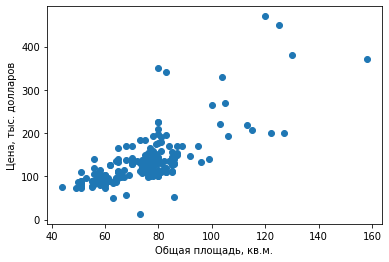

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

n = 200
TS = np.array(TS)
Pr = np.array(Pr)
plt.scatter(TS, Pr)
plt.xlabel("Общая площадь, кв.м.")
plt.ylabel("Цена, тыс. долларов")
plt.show()

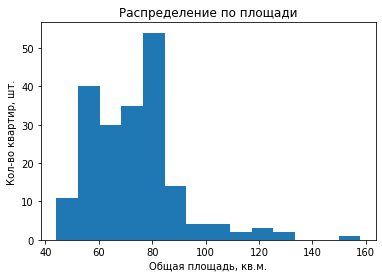

In [44]:
plt.hist(TS, bins=14)
plt.title("Распределение по площади")
plt.xlabel("Общая площадь, кв.м.")
plt.ylabel("Кол-во квартир, шт.")
plt.show()

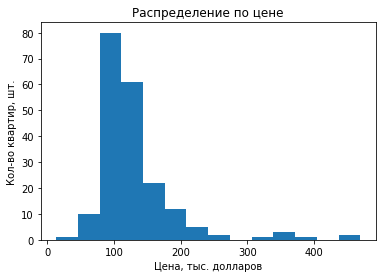

In [45]:
plt.hist(Pr, bins=14)
plt.title("Распределение по цене")
plt.xlabel("Цена, тыс. долларов")
plt.ylabel("Кол-во квартир, шт.")
plt.show()

In [18]:
sig_X = sqrt(sum(((TS - TS.mean())**2)/len(TS)))
sig_Y = sqrt(sum(((Pr - Pr.mean())**2)/len(Pr)))
print(f"sigma_X = {sig_X}\nsigma_Y = {sig_Y}")

sigma_X = 16.300612718545274
sigma_Y = 62.11932046473144


Из вида графика площадь-цена можно предположить, что значения цены и площади коррелируют.
Проверим эту гипотезу.
### Корреляционный анализ
**Корреляция**  — математический показатель, по которому можно судить, есть ли статистическая взаимосвязь между случайными величинами. Если такая связь существует, изменения значений одной величины влияют на другую.

**Коэффициент корреляции** показывает, насколько велика взаимосвязь. Обозначается символами $R$ или $r$ и может принимать значения от -1 до 1 включительно.

**Коэфициент корреляции Пирсона**, используемый  для определения корреляции интервальных и количественных признаков, находится по формуле:

$$r_{XY} = \frac{cov_{XY}}{\sigma_{X}\sigma_{Y}}$$

где $cov_{XY}$ - **ковариация** или корреляционный момент — параметрический показатель, позволяющий судить о совместном распределении двух признаков. Равна математическому ожиданию произведения отклонений случайных величин:

$$cov_{XY} = M[(X - M(X))(Y - M(Y))] = M(XY) - M(X)M(Y)=\overline{X \cdot Y} - \overline{X} \cdot \overline{Y},$$

а $\sigma_{X}$ и $\sigma_{Y}$ - соответственно средние квадратичные отклонения величин.

In [58]:
xy = TS * Pr
covar = xy.mean() - (TS.mean() * Pr.mean())
r = covar/(sig_X * sig_Y)
print(f" Ковариация по формуле: {covar}\n Ковариация через встроенную функцию: {np.cov(TS, Pr, ddof=0)[0][1]}")
print(f" Коэфициент корреляции Пирсона по формуле: {r}\n Коэфициент корреляции Пирсона через встроенную функцию: {np.corrcoef(TS, Pr)[0][1]}")

 Ковариация по формуле: 751.5150250000006
 Ковариация через встроенную функцию: 751.515025
 Коэфициент корреляции Пирсона по формуле: 0.7421762324257744
 Коэфициент корреляции Пирсона через встроенную функцию: 0.7421762324257741


Как показанно выше - коэфициент корреляции имеет достаточно высокое значение, следовательно величины действительно имеют сильную взаимосвязь.
### Построение линейной регрессии
Линейная регрессия сводится к сведению взаимосвязи между случайными величинами к линейной связи вида

$$y = a + bx$$

Коэффициенты уравнения линейной регрессии можно найти следующим образом:

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [52]:
b = (np.mean(TS * Pr) - np.mean(TS) * np.mean(Pr)) / (np.mean(TS**2) - np.mean(TS)**2)
a = np.mean(Pr) - b * np.mean(TS)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(TS.reshape(-1, 1), Pr)
print(f"Коэффициенты уравнения линейной регрессии через формулы:\nb = {b}\na = {a}")
print(f"Коэффициенты уравнения линейной регрессии из модели из библиотеки sklearn:\nb = {float(model.coef_)}\na = {model.intercept_}")

Коэффициенты уравнения линейной регрессии через формулы:
b = 2.828328236454046
a = -76.40126702055463
Коэффициенты уравнения линейной регрессии из модели из библиотеки sklearn:
b = 2.8283282364540496
a = -76.40126702055491


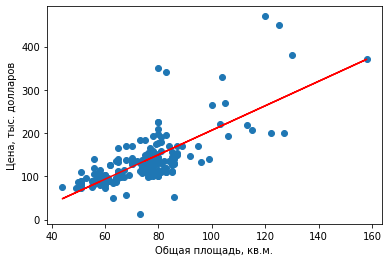

In [55]:
plt.scatter(TS, Pr)
plt.plot(TS, a+b*TS, c='Red')
plt.xlabel("Общая площадь, кв.м.")
plt.ylabel("Цена, тыс. долларов")
plt.show()

Найдем коэффициент детерминации 𝑅2:

In [60]:
R_2 = r**2
print(f"R^2 = {R_2}")

R^2 = 0.550825559977717


Предсказанные нашей моделью значения цен:

In [63]:
Pr_pred = a + b * TS

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

$$\overline{A} = \frac{1}{n} \sum\limits_{i=1}^{n} \Bigl |{{\frac{y_i - \hat{y}_i}{y_i}} \Bigr |} \cdot{100\%}$$

In [64]:
A_mean = 100 * np.mean(np.abs((Pr - Pr_pred) / Pr))
A_mean

24.11567396701802

Так как $\overline {A}$ = 24%, что существенно превышает 8-10 %, модель недостаточно хорошо описывает эмпирические данные. 


Оценим статистическую значимость уравнения линейной регрессии. Для этого воспользуемся F-критерием Фишера. Найдем фактическое значение $F$-критерия ($F_{факт}$):

$$F_{факт} = \frac{r_{xy}^{2} \cdot (n - 2)}{(1 - r_{xy}^{2})}$$



In [69]:
F_fact = (R_2 * (n - 2)) / (1 - R_2)
F_fact

242.80869781944284

При уровне значимости $\alpha = 5\%$ и степенях свободы $k_1 = 1$ и $k_2 = 200 - 2 = 198$ табличное значение критерия: $F_{кр} \approx 3.89$.

Так как $F_{факт} = 242.8 > F_{кр} = 3.89$, уравнение регрессии статистически значимо.